In [1]:
#Basic imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_excel('data.xlsx', 'Timepoint 1', header=1)

In [3]:
def clean_data1(df):
    X = df.copy()
    # Remove columns with only zeros
    X = X.loc[:, (X != 0).any(axis=0)]
    
    # Replace zeros by nan
    X.replace(0, np.nan, inplace=True)
    
    # Replace nan values by mean of column
    X = X.fillna(X.mean())
                     
    # Replace Sex labels by values
    X['Sex'].replace({1:'Male', 2:'Female'}, inplace=True)
    
    # Remove useless columns
    X = X.drop(['Patient ID', 'Batch Process ID'], axis=1)
    
    # Split Sex in Sex_Female and Sex_Male
    X = pd.get_dummies(X)
    
    return X

In [4]:
def scale_data1(df):
    X = df.copy()
    # Categorical values
    cater = X[['Sex_Female','Sex_Male']]
    # Numerical values
    numer = X.drop(['Sex_Female', 'Sex_Male'], axis=1)
    #Initialize our scaler
    scaler = StandardScaler()
    #Scale each column in numer
    numer = pd.DataFrame(scaler.fit_transform(numer), columns=numer.columns)
    
    X_scaled = pd.concat([numer, cater], axis=1, join='inner')
    return X_scaled

In [5]:
X = clean_data1(df)
y = X['Age']
X = X.drop(['Age'], axis=1)
X_scaled = scale_data1(X)

In [6]:
print(X_scaled.iloc[:,2])

0      0.362989
1     -1.784112
2     -0.079246
3     -1.747616
4      2.852872
         ...   
128    1.113246
129    1.232042
130    0.979995
131   -0.487266
132   -0.996849
Name: [norm] 4th ventricle total volume, Length: 133, dtype: float64


In [7]:
#Split the data into train and test set: 
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) 

# Gaussian Mixture Model: 

Find the optimal number of clusters. 

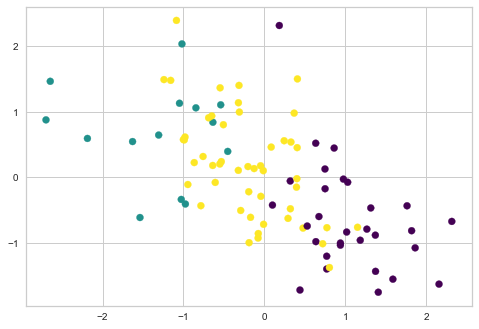

In [10]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(x_train)
clusters = gmm.predict(x_train)
score = gmm.score(x_train)

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=clusters, cmap='viridis')
plt.show()

In [11]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [12]:
#Compute silhouette score, which checks how much the clusters are compact and well separated.
#The closer to 1, the better.
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(x_train) 
        labels=gmm.predict(x_train)
        sil=metrics.silhouette_score(x_train, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

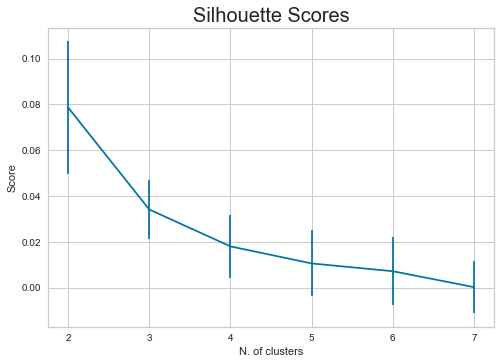

In [13]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

Number of clusters : 2

In [21]:
# Train GMM with 2 clusters
gmm = GaussianMixture(n_components=2).fit(x_train)
cluster_labels = gmm.predict(x_train)

clusters = gmm.fit(x_train)
labels = gmm.predict(x_train)

# Elastic Net Model: